In [28]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc 
import dash_html_components as html
import chart_studio.plotly as py
from pandas_datareader import data as web 
from datetime import datetime as dt
import plotly.offline as py
# Set style & figures inline
sns.set()
%matplotlib inline

In [29]:
df= pd.read_csv( 'covid_19_data.csv')

In [30]:
df.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0
116804,116805,09/23/2020,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0


In [31]:
df.info()


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [32]:
#float_col = df.select_dtypes(include=['float64']) # This will select float columns only
# list(float_col.columns.values)
#for col in float_col.columns.values:
#    df[col] = df[col].astype('int64')

In [33]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [34]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,116805.000000,1.168050e+05,116805.000000,1.168050e+05
mean,58403.000000,1.908217e+04,777.745473,1.117002e+04
std,33718.843434,5.825465e+04,2859.184068,6.258701e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,29202.000000,2.450000e+02,3.000000,4.000000e+00
50%,58403.000000,2.148000e+03,42.000000,4.260000e+02
75%,87604.000000,1.037400e+04,331.000000,3.829000e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


In [35]:
df = df.drop(['SNo','Last Update'],axis=1)
df = df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'})
df.head()


,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [36]:
df.tail()


,Date,State,Country,Confirmed,Deaths,Recovered
116800,09/23/2020,Zaporizhia Oblast,Ukraine,3149.0,49.0,1158.0
116801,09/23/2020,Zeeland,Netherlands,1270.0,72.0,0.0
116802,09/23/2020,Zhejiang,Mainland China,1282.0,1.0,1272.0
116803,09/23/2020,Zhytomyr Oblast,Ukraine,5191.0,92.0,2853.0
116804,09/23/2020,Zuid-Holland,Netherlands,29513.0,1372.0,0.0


In [37]:
confirmed = df.groupby(['Country']).sum()[['Confirmed','Recovered','Deaths']].sort_values(by=['Confirmed'], ascending=False)
confirmed.head()

,Confirmed,Recovered,Deaths
Country,,,
US,557588267.0,174911575.0,21189260.0
Brazil,301632363.0,230105907.0,10657805.0
India,238342983.0,173210742.0,4630497.0
Russia,101499236.0,70205110.0,1582441.0
Peru,53724353.0,35921289.0,2184904.0


In [38]:
df.Date = pd.to_datetime(df.Date.astype(str), dayfirst=False, errors='coerce')

In [39]:
df.Date.tail()

116800   2020-09-23
116801   2020-09-23
116802   2020-09-23
116803   2020-09-23
116804   2020-09-23
Name: Date, dtype: datetime64[ns]

In [40]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       116805 non-null  datetime64[ns]
 1   State      81452 non-null   object        
 2   Country    116805 non-null  object        
 3   Confirmed  116805 non-null  float64       
 4   Deaths     116805 non-null  float64       
 5   Recovered  116805 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.3+ MB


In [41]:
cumulative_confirmed = df.groupby('Date').Confirmed.sum()
cumulative_confirmed = cumulative_confirmed.groupby(cumulative_confirmed.index.to_period('y')).cumsum().reset_index()
cumulative_confirmed.tail(10)


,Date,Confirmed
236,2020-09-14,1.952920e+09
237,2020-09-15,1.982478e+09
238,2020-09-16,2.012242e+09
239,2020-09-17,2.042320e+09
240,2020-09-18,2.072727e+09
241,2020-09-19,2.103415e+09
242,2020-09-20,2.134350e+09
243,2020-09-21,2.165596e+09
244,2020-09-22,2.197113e+09
245,2020-09-23,2.228893e+09


confirmed_graph = go.Scatter(x=cumulative_confirmed.Date,y=cumulative_confirmed.Confirmed)
layout = go.Layout(title='Confirmed Cases', xaxis=dict(title='Date'), yaxis=dict(title='(Number)'))
fig = go.Figure(data=[confirmed_graph], layout=layout)
py.iplot(fig, sharing='public')

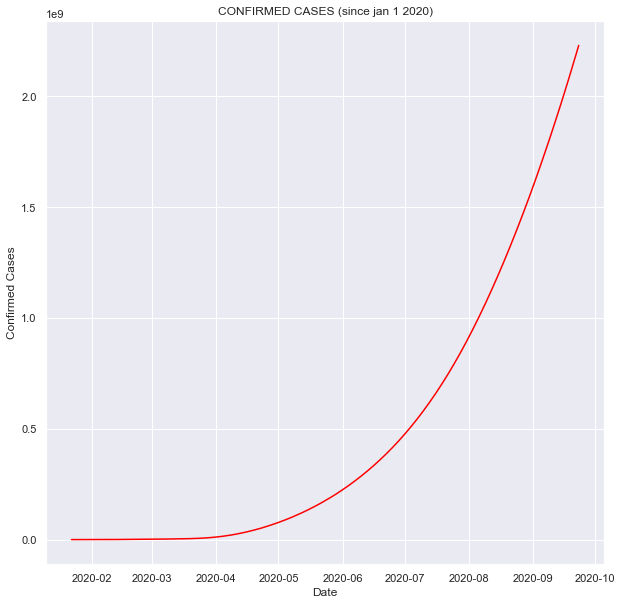

In [42]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(cumulative_confirmed['Date'],
        cumulative_confirmed['Confirmed'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Confirmed Cases",
       title="CONFIRMED CASES (since jan 1 2020)")

plt.show()

In [43]:
cumulative_recovered = df.groupby('Date').Recovered.sum()
cumulative_recovered = cumulative_recovered.groupby(cumulative_recovered.index.to_period('y')).cumsum().reset_index()
cumulative_recovered.head(10)


,Date,Recovered
0,2020-01-22,28.0
1,2020-01-23,58.0
2,2020-01-24,94.0
3,2020-01-25,133.0
4,2020-01-26,185.0
5,2020-01-27,246.0
6,2020-01-28,353.0
7,2020-01-29,479.0
8,2020-01-30,622.0
9,2020-01-31,844.0


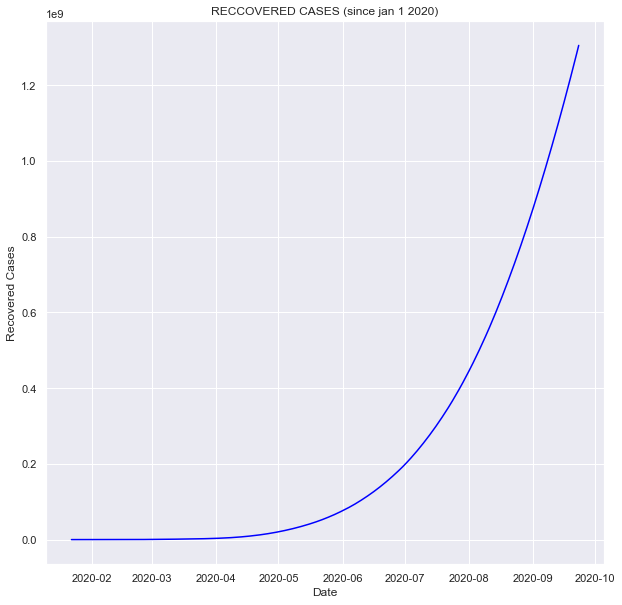

In [44]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(cumulative_recovered['Date'],
        cumulative_recovered['Recovered'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Recovered Cases",
       title="RECCOVERED CASES (since jan 1 2020)")
plt.show()

In [45]:
cumulative_deaths = df.groupby('Date').Deaths.sum()
cumulative_deaths = cumulative_deaths.groupby(cumulative_deaths.index.to_period('y')).cumsum().reset_index()
cumulative_deaths.head(10)

,Date,Deaths
0,2020-01-22,17.0
1,2020-01-23,35.0
2,2020-01-24,61.0
3,2020-01-25,103.0
4,2020-01-26,159.0
5,2020-01-27,241.0
6,2020-01-28,372.0
7,2020-01-29,505.0
8,2020-01-30,676.0
9,2020-01-31,889.0


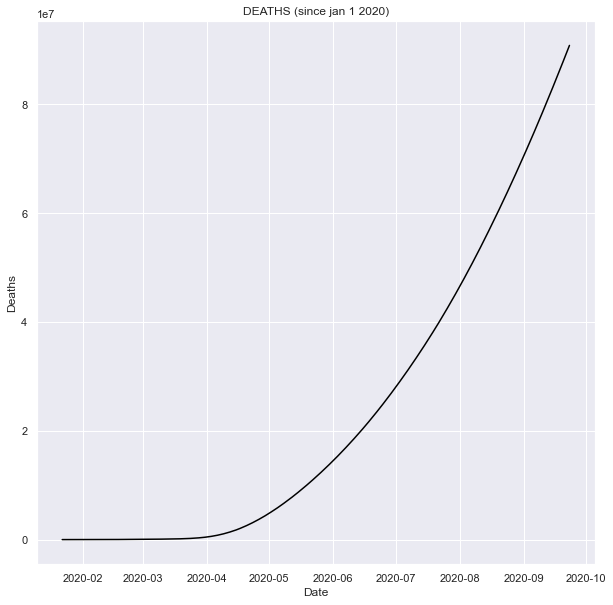

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(cumulative_deaths['Date'],
        cumulative_deaths['Deaths'],
        color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="DEATHS (since jan 1 2020)")

plt.show()

In [47]:
cumulative_final=pd.concat([cumulative_recovered,cumulative_confirmed.drop(['Date'],axis =1),cumulative_deaths.drop(['Date'],axis =1)],axis=1,sort=False)
cumulative_final.head(10)

,Date,Recovered,Confirmed,Deaths
0,2020-01-22,28.0,555.0,17.0
1,2020-01-23,58.0,1208.0,35.0
2,2020-01-24,94.0,2149.0,61.0
3,2020-01-25,133.0,3587.0,103.0
4,2020-01-26,185.0,5705.0,159.0
5,2020-01-27,246.0,8632.0,241.0
6,2020-01-28,353.0,14210.0,372.0
7,2020-01-29,479.0,20375.0,505.0
8,2020-01-30,622.0,28610.0,676.0
9,2020-01-31,844.0,38535.0,889.0


In [54]:
import chart_studio.plotly as py
import plotly.graph_objects as go

trace_Confirmed = go.Line(x=cumulative_final.Date,
                  y=cumulative_final.Confirmed,
                  name='Confirmed Cases',
                  marker=dict(color='red'))

trace_Recovered = go.Line(x=cumulative_final.Date,
                y=cumulative_final.Recovered,
                name='Recovered Cases',
                marker=dict(color='green'))

trace_Deaths = go.Line(x=cumulative_final.Date,
                y=cumulative_final.Deaths,
                name='Deaths',
                marker=dict(color='black'))

data = [trace_Confirmed, trace_Recovered, trace_Deaths]

layout = go.Layout(title="COVID",
                xaxis=dict(title='School'),
                yaxis=dict(title='Cases'))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='cumulative_final_graph')

&lt;IPython.lib.display.IFrame at 0x1fec7ebbcd0&gt;